# Example: Detecting multicollinearity

We will once again use our university admission [dataset](https://drive.google.com/file/d/13HPgfc4HP9UP-gHM2lutJ7MXSt-dAL1d/view)

First, let's understand how our independent variables are correlated to each other

In [1]:
import numpy as np
import pandas as pd

# Load the dataset
data = pd.read_csv('data/uni_admission.csv')

# Remove the serial and admit chance columns, we want to focus on our independent variables only.
independent_only = data.drop(columns=['Serial No.', 'admit_chance'])

# Let's display the correlations between the variables
correlations = independent_only.corr()

correlations

,GRE,TOEFL,uni_rating,SOP,LOR,CGPA,publications
GRE,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398
TOEFL,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012
uni_rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311
publications,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000


In [19]:
data.describe()

,Serial No.,GRE,TOEFL,uni_rating,SOP,LOR,CGPA,publications,admit_chance
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


The tabe above shows us how each variable relates to another. The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself. Let's use these correlations to compute the VIF score for each variable. This will require a little bit of linear algebra, but the approach is straightforward: we create a new dataframe with the *inverse* of the matrix above.

In [2]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,GRE,TOEFL,uni_rating,SOP,LOR,CGPA,publications
GRE,4.464249,-1.919309,-0.167441,0.115539,0.163716,-1.829666,-0.738214
TOEFL,-1.919309,3.904213,-0.280590,-0.320530,0.008925,-1.216918,0.115389
uni_rating,-0.167441,-0.280590,2.621036,-1.003439,-0.326820,-0.504916,-0.109544
SOP,0.115539,-0.320530,-1.003439,2.835210,-0.715324,-0.670228,-0.041512
LOR,0.163716,0.008925,-0.326820,-0.715324,2.033555,-0.650578,-0.096312
CGPA,-1.829666,-1.216918,-0.504916,-0.670228,-0.650578,4.777992,-0.064604
publications,-0.738214,0.115389,-0.109544,-0.041512,-0.096312,-0.064604,1.494008


Interpreting the table is straightforward: The VIF score for each variable is found alongside the downwards sloping diagonal. GRE has a score of 4.46, TOEFL has a score of 3.9, uni_rating a score of 2.62, etc.

CGPA has a value nearing 5, let's see how the VIF scores improve if we remove it from our dataset

In [9]:
revised = independent_only.drop(columns=['CGPA','TOEFL'])

correlations = revised.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)



,GRE,uni_rating,SOP,LOR,publications
GRE,2.180611,-0.632346,-0.467117,-0.189454,-0.697296
uni_rating,-0.632346,2.521095,-1.130190,-0.413417,-0.105108
SOP,-0.467117,-1.130190,2.674058,-0.828010,-0.037053
LOR,-0.189454,-0.413417,-0.828010,1.938133,-0.100793
publications,-0.697296,-0.105108,-0.037053,-0.100793,1.490411


## Using VIF in other ways to determin weight of variables 

In [27]:
#Let me do it using the VIF function
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=data.drop(columns=['Serial No.', 'admit_chance'])
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

       features   vif_Factor
0           GRE  1308.061089
1         TOEFL  1215.951898
2    uni_rating    20.933361
3           SOP    35.265006
4           LOR    30.911476
5          CGPA   950.817985
6  publications     2.869493


In [28]:
cols = list(vif['features'])
cols

['GRE', 'TOEFL', 'uni_rating', 'SOP', 'LOR', 'CGPA', 'publications']

In [34]:
data.head()

,Serial No.,GRE,TOEFL,uni_rating,SOP,LOR,CGPA,publications,admit_chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [29]:
X = data[cols]
y = data['admit_chance']
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: admit_chance, Length: 500, dtype: float64

In [30]:
# Train using 80% of the data.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# find optimal coefficients and intercept
regressor = LinearRegression()  
regressor.fit(X_train, y_train)


LinearRegression()

In [31]:
from sklearn import metrics

y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#  Gives a better RMSSE even when you dont do away with the values that have high VIF 


Mean Absolute Error: 0.048253893748654714
Mean Squared Error: 0.004079680034602104
Root Mean Squared Error: 0.06387237301527245


All scores dropped, but the GRE's in particular did quite a bit, indicating that GRE and CGPA were colinear. 

# Example 2: Residual plots and heteroskedasticity testing

Let's start by creating a model based on our revised set of independent variables above, then displaying the residual plot for it.

In [39]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = revised.values
y = data['admit_chance'].values
#print(X)

X_train, X_test, admit_train, admit_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, admit_train)

# This is our prediction for admission based on our model
admit_predict = regressor.predict(X_test)
#print(admit_predict)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(admit_predict, admit_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()
#print(residuals)
print(residuals.mean())


-0.004327928908138407


Before we interpret the description above, let's recall what we are trying to predict: The percentage chance of admission to university. This means values between 0 and 1. 

Our min and max for the residual are fairly high: they suggest we've been up to 26% off target. It's important for us to plot this first: Is this a common occurence, or a few outliers?

Our mean on the other hand is close to 0, indicating that we tend to be fairly correct, although slightly over estimating chances by, on average, 0.17%

Let's show the residual plot

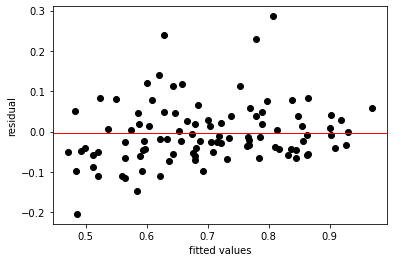

In [40]:
import matplotlib.pyplot as plt

plt.scatter(admit_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

This does not look too bad: our residuals are centered around a mean that is very close to 0, and there are no glaringly obvious patterns. Let's be thorough though, and perform a heteroskedasticity test.

For this we will use [bartlett's test](https://www.itl.nist.gov/div898/handbook/eda/section3/eda357.htm). The test establishes as a null hypothesis that the variance is equal for all our datapoints,and the new hypothesis that the variance is different for at least one pair of datapoints.


In [42]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(admit_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(admit_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value )

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')



179.79090295708536
the variances are homogeneous!


# Challenge

We will bring this all together by adapting a challenge from data.world. In the code section below you have access to a large dataset with demographic and medical data for cancer occurances in regions in the US. Your aim is to build a model that predicts the **target_deathrate** variable. You can find descriptions of all the columns [here](https://data.world/exercises/linear-regression-exercise-1)

This is a holistic challenge:


*   Make sure to clean up your data first, there are some missing elements.
*   Some data should be changed: Add a **state** column which indicates the state a person lives in(you can modify the geography column). Perform a multicollinearity test: Should **state** be included in your model or not?
* If it should be, make sure to transform it since we want to be dealing with numerical data.
* Build a model, then display the residual plot for it. Perform a Bartlett test to determine if your model is acceptable or not.





In [103]:
# Your code goes here!
df = pd.read_csv('https://query.data.world/s/4n3rdrpeu6qrfo63yacah7v3ofoaag')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  percentmarried           3047 non-null   float64
 14  pctnohs18_24            

<AxesSubplot:>

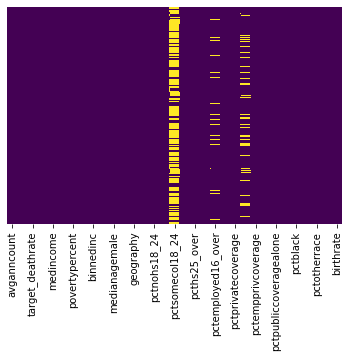

In [104]:
import seaborn as sns
sns.heatmap(df.isnull(), yticklabels=False,cbar=False, cmap='viridis')

In [81]:
df.describe()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,9.018885,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,43.100000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.453774,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,53.800000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [68]:
df=df.drop(columns='pctsomecol18_24')
df['pctprivatecoveragealone'].fillna((df['pctprivatecoveragealone'].mean()), inplace=True)
df['pctemployed16_over'].fillna((df['pctemployed16_over'].mean()), inplace=True)

In [69]:
df.isna().any().sum()

0

In [94]:
#Let me do it using the VIF function
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=df.drop(columns=['target_deathrate', 'binnedinc','geography','pctmarriedhouseholds','medianagefemale','percentmarried'], axis=1)
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                   features  vif_Factor
0               avganncount   11.436189
1          avgdeathsperyear   34.919935
2             incidencerate   84.723027
3                 medincome   99.683053
4                popest2015   28.440313
5            povertypercent   41.971202
6               studypercap    1.134506
7                 medianage    2.045323
8             medianagemale  225.605578
9              pctnohs18_24    9.284972
10               pcths18_24   24.934868
11          pctbachdeg18_24    5.386668
12             pcths25_over   90.901776
13        pctbachdeg25_over   37.470593
14       pctemployed16_over  134.101416
15     pctunemployed16_over   15.132445
16       pctprivatecoverage  566.374755
17  pctprivatecoveragealone  141.173399
18       pctempprivcoverage  148.766122
19        pctpubliccoverage  512.197091
20   pctpubliccoveragealone  242.629236
21                 pctwhite  156.546088
22                 pctblack    6.648520
23                 pctasian    2.405121


In [95]:
cols = list(vif['features'])
cols

['avganncount',
 'avgdeathsperyear',
 'incidencerate',
 'medincome',
 'popest2015',
 'povertypercent',
 'studypercap',
 'medianage',
 'medianagemale',
 'pctnohs18_24',
 'pcths18_24',
 'pctbachdeg18_24',
 'pcths25_over',
 'pctbachdeg25_over',
 'pctemployed16_over',
 'pctunemployed16_over',
 'pctprivatecoverage',
 'pctprivatecoveragealone',
 'pctempprivcoverage',
 'pctpubliccoverage',
 'pctpubliccoveragealone',
 'pctwhite',
 'pctblack',
 'pctasian',
 'pctotherrace',
 'birthrate']

In [96]:
X = df[cols]
y = df['target_deathrate']
y

0       164.9
1       161.3
2       174.7
3       194.8
4       144.4
        ...  
3042    149.6
3043    150.1
3044    153.9
3045    175.0
3046    213.6
Name: target_deathrate, Length: 3047, dtype: float64

In [97]:
# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# find optimal coefficients and intercept
regressor = LinearRegression()  
regressor.fit(X_train, y_train)


LinearRegression()

In [98]:
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 14.228185045844759
Mean Squared Error: 350.79775416590314
Root Mean Squared Error: 18.72959567545181
